# Part 1: Predicting Breast Cancer Diagnosis

Author: Lydia Jeong
<br>
INF2179 - Machine Learning with Applications in Python
<br>
August 21, 2020

## 1. Introduction

In spite of significant research and public awareness, breast cancer remains as the most common cancer and the largest cause of cancer deaths among women worldwide (World Health Organization, 2020). An estimated 1 in 8 Canadian women will develop breast cancer, and 1 in 33 will die of it (Government of Canada, 2019). Therefore, early diagnosis and treatment is vital for improving the patient’s chances of survival. Fortunately, with advancement in medical research, breast cancer can be detected with a high level of certainty. Using the Wisconsin Diagnostic Breast Cancer (WDBC) dataset, machine learning algorithms can be developed to predict cancer diagnosis.
<br>
<br>
The WDBS dataset contains quantitative cytological data collected from Fine Needle Aspiration (FNA) samples of breast tumors. Data collection involved extracting a small tissue sample from the tumor with a thin needle, capturing the histological images of these samples, and collecting cell nucleus characteristics based on quantitative measurements obtained from the images.

## 2. Data Description

The Wisconsin Diagnostic Breast Cancer (WDBS) dataset is available on Kaggle’s online repository: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

The dataset contains information about key cell nuclear characteristics from examined breast mass, including nuclear size, shape, and texture. Each instance contains the following attributes:
* ID number
* Diagnosis (M = malignant, B = benign)

In the remaining 30 columns, there are three measures for each of the following 10 features: the mean, the standard error, and the worst value (mean of the top 3 largest or extreme values) of
* Radius
* Texture
* Perimeter
* Area
* Smoothness
* Compactness
* Concavity
* Concave Points
* Symmetry
* Fractal Dimension

There are 357 Benign and 212 Malignant samples.

## 3. Exploratory Data Analysis

### Load the data into a data structure.

Import libraries that we will be using and load the datasets.

In [110]:
import numpy as np
import pandas as pd
import scipy
import urllib
import sklearn
import seaborn as sns
import pydotplus
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import joblib
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import neighbors
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.externals.six import StringIO
from io import StringIO
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [111]:
df = pd.read_csv("datasets_180_408_data.csv")

### Examining the data

First, I examined the data. The first and last five rows of the dataframe is displayed, as well as the basic information about the dataframe.

In [99]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We see that the last column is "Unnamed: 32" and contains null values, therefore we remove this unnecessary column.

In [100]:
df.drop(['Unnamed: 32'], axis = 1, inplace = True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

From displaying the data info, we see that the id column is integer, diagnosis column is object or categorical (either M for Malignant or B for Benign), and the rest of the features are floating-point numbers. In addition, there are no null or missing values.

In [102]:
df.shape

(569, 32)

The dataset contains 569 rows and 32 columns.

Number of Malignant samples:  212
Number of Benign samples:  357


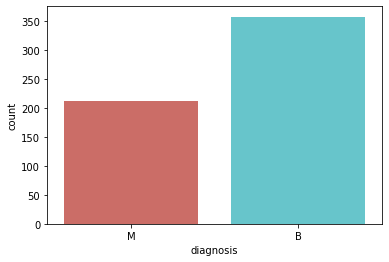

In [103]:
sns.countplot(x='diagnosis', data=df, palette='hls')
print("Number of Malignant samples: ", len(df[df['diagnosis'] == 'M']))
print("Number of Benign samples: ", len(df[df['diagnosis'] == 'B']))

There are 212 Malignant and 357 Benign samples.

### Boxplots to visualize the difference between the two classes (M and B)

In order to find out if there are any differences between the M and B based on the cell nucleus features, I have visualized this difference using box plots.

In [112]:
y = df.diagnosis

# 'id' and 'diagnosis' is dropped because 'id' is not relevant for classification and 'diagnosis' is our target variable.
X = df.drop(['id', 'diagnosis'], axis = 1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

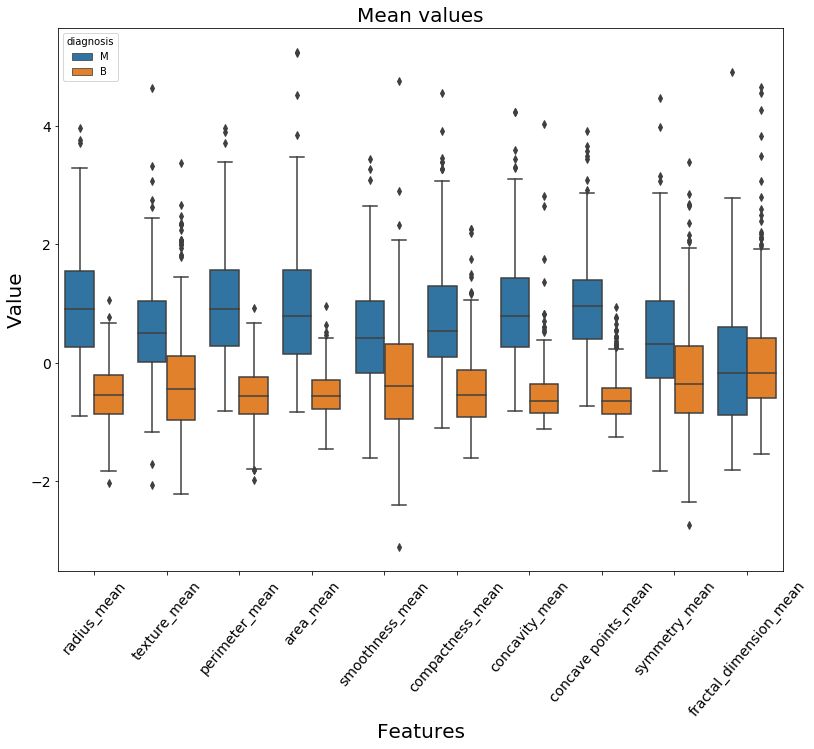

In [113]:
# first ten features
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(13,10))

box_plot = sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
box_plot.axes.set_title("Mean values",fontsize=20)
box_plot.set_xlabel("Features",fontsize=20)
box_plot.set_ylabel("Value",fontsize=20)
box_plot.tick_params(labelsize=14)
plt.xticks(rotation=50)

The first ten features are the mean values. From visualizing this boxplot, I can see that the Malignant values are generally higher than the Benign for all features except for fractal_dimension_mean. Therefore, since fractal_dimension_mean may not be useful for classifying between M and B, this feature may be dropped when doing our machine learning analysis.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

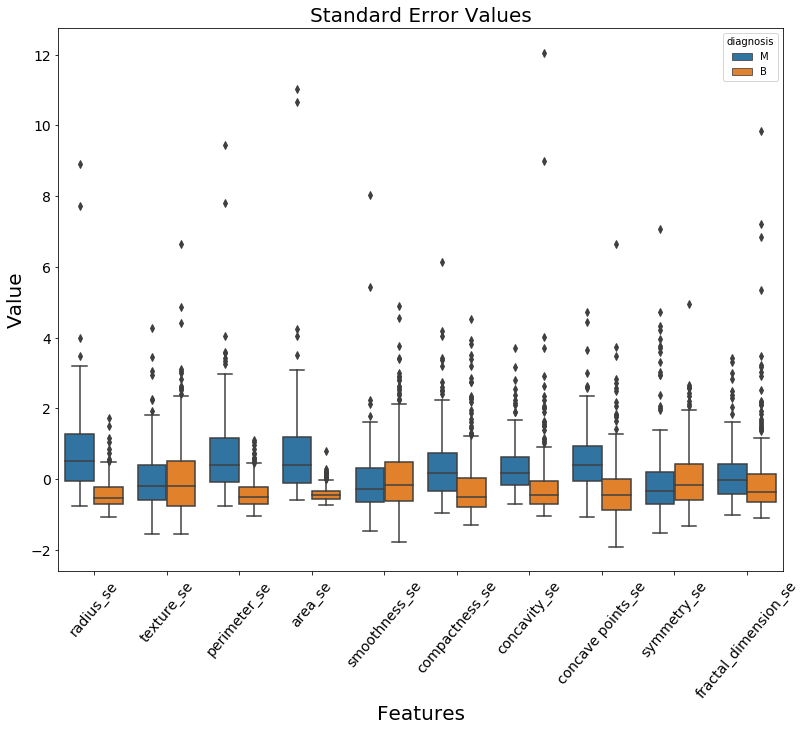

In [114]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(13,10))
box_plot = sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
box_plot.axes.set_title("Standard Error Values",fontsize=20)
box_plot.set_xlabel("Features",fontsize=20)
box_plot.set_ylabel("Value",fontsize=20)
box_plot.tick_params(labelsize=14)
plt.xticks(rotation=50)

The next ten features are the standard error values. It appears that several of these features, specifically texture_se, smoothness_se, symmetry_se, and fractal_dimension_se may not be relevant in helping us classify our target variable, therefore, we may consider dropping these features as well.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

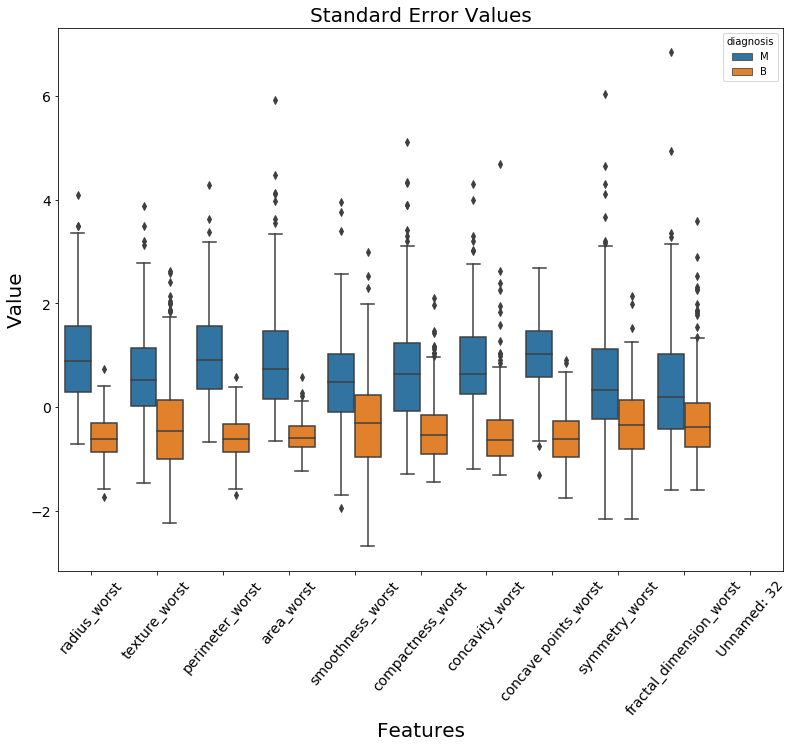

In [115]:
# Third ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(13,10))
box_plot = sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
box_plot.axes.set_title("Standard Error Values",fontsize=20)
box_plot.set_xlabel("Features",fontsize=20)
box_plot.set_ylabel("Value",fontsize=20)
box_plot.tick_params(labelsize=14)
plt.xticks(rotation=50)

The last ten features are the worst or extreme values. They appear to be relevant features because all M values are higher than B. Therefore, these features may be useful to keep.

From the generated boxplots, the malignant cell nucleus typically had higher values compared to benign cell nucleus for most of the features. The features that did not display this trend were the mean fractal dimension, standard error of texture, smoothness, and symmetry, suggesting that they may not be relevant or useful features for classifying between the Malignant (M) and Benign (B) classes. As expected, they were dropped later in the analysis during the feature selection process.
<br>
<br>
You can also see from the boxplots that there are some outliers. They were not removed because it reduced the sample size from 569 to 277 and more overlap between the malignant and benign classes were evident. This effect worsened the model's performance, and hence, the outliers were kept in our analysis. This issue will be address in the discussion section.

### Histogram to visualize the overlap between the two classes

The frequency distribution between the M and B illustrated some overlap between the two classes for all features.

Distribution of radius_mean


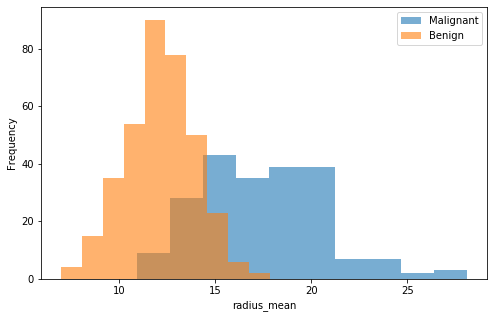

Distribution of texture_mean


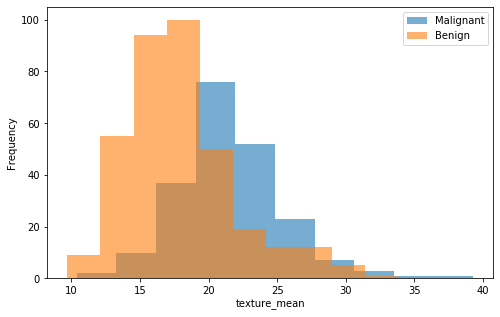

Distribution of perimeter_mean


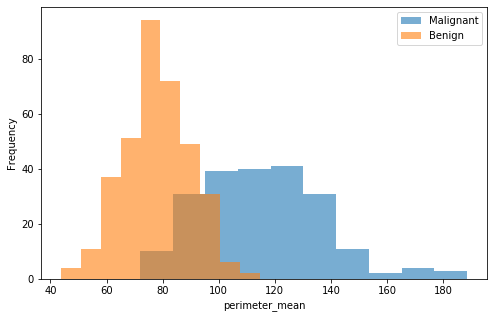

Distribution of area_mean


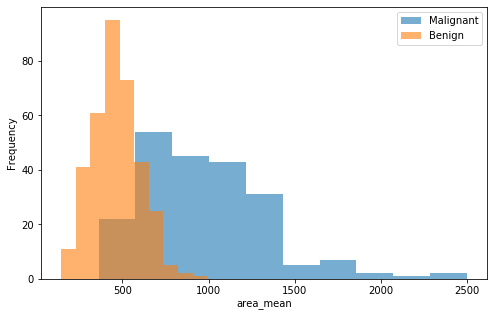

Distribution of smoothness_mean


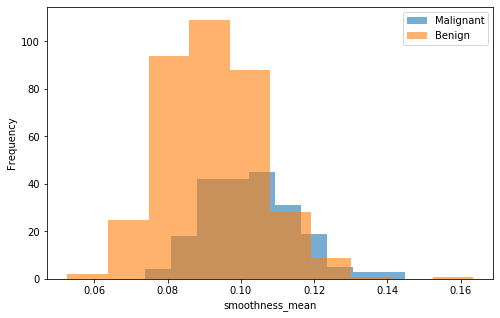

Distribution of compactness_mean


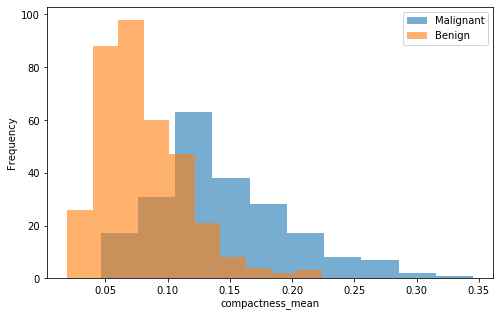

Distribution of concavity_mean


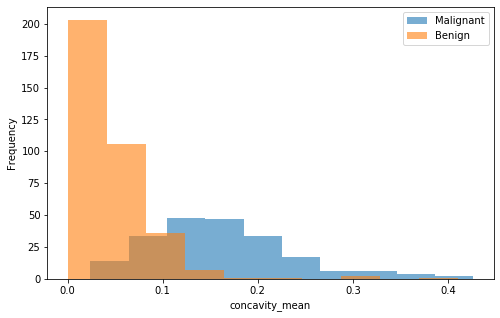

Distribution of concave points_mean


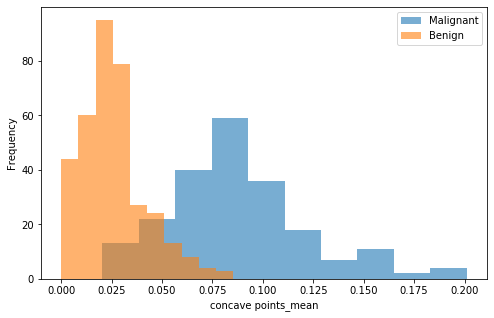

Distribution of symmetry_mean


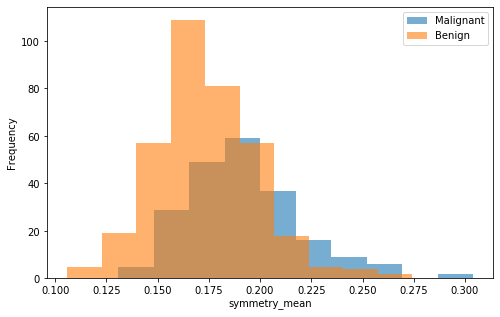

In [116]:
mean_attributes = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean']]

for attribute in mean_attributes:
    for i in df['diagnosis'].unique():
        df_i = df[df['diagnosis'] == i]
        ax = df_i[attribute].plot(kind = 'hist', figsize = (8,5), alpha = 0.6)
        ax.legend(['Malignant', 'Benign'])
        plt.ylabel('Frequency')
        plt.xlabel(attribute)
    print('Distribution of', attribute)
    plt.show()

### Heatmap to visualize feature dependencies

Finally, a heatmap is displayed to determine if there are any correlations between each features. It is evident that some features are highly correlated with others, for example, 'radius_mean' is highly correlated with the 'perimeter_mean' and the 'area_mean'. This information will be important when doing a logistic regression as logistic regression assumes that variables are independent of one another. Therefore, we may drop these attributes as necessary.

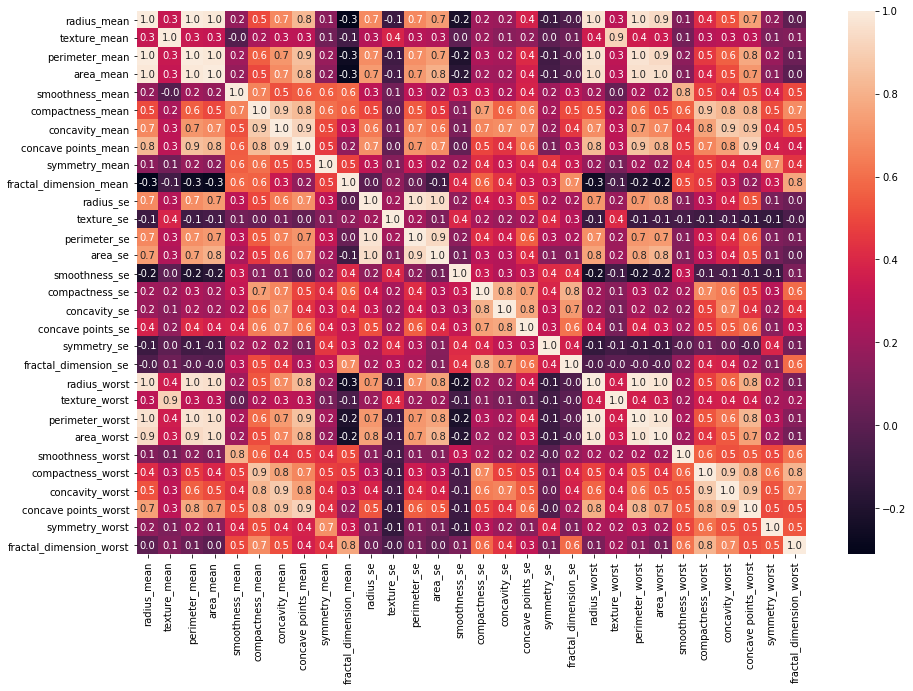

In [14]:
df_heatmap = df.iloc[:,2:]

f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df_heatmap.corr(), annot=True, fmt='.1f', ax=ax)

## 4. Research Questions

These interesting phenomena observed from basic exploratory analyses gave rise to three research questions, which are proposed below:
<br>
<br>
* Question 1:	What attributes are the best predictors of breast tumor diagnosis?
* Question 2:	How can we predict breast tumor diagnosis based on the features of the cell nucleus?
* Question 3:	Can we predict whether cancer will reoccur? If yes, can we predict when the cancer will likely recur after patients have been treated? (Part 2)
<br>
<br>
For Question 1, the rationale was to determine the attributes that lead to highest predictive accuracy and drop those that do not have a significant impact on diagnosis so that we can make a more accurate prediction based on select features. For Question 2, we instantiated our data and conducted analysis through kNN, Gradient Boosting, XGBoost, and logistic regression classifier to determine the model with the best predictive accuracy. Finally, for Question 3, we instantiated time-series data from the prognostic dataset to test their accuracy in tumor classification and attempt to predict recurrence of cancer. Question 3 is answered in Part 2 Breast Cancer Prognosis notebook.

## 5. Techniques

Data was prepared by checking for any missing values, errors, or duplicates, and removing them, as necessary. Feature selection was determined by selecting the top nodes in the decision tree. The most relevant or important features were verified from random forest’s feature importance property, which computed the Gini importance values for each feature. From the selected features, data normalization was performed, and the datasets were split into 75% training and 25% testing sets. kNN, Gradient Boosting, XGBoost, and logistic regression were selected for machine learning analysis. Hyperparameter tuning was performed for each model to determine the best parameters that can improve the model’s performance. The models were trained and tested for each of these four models. Accuracy was determined by the 5-fold cross-validation score (Stone, 1974), and these values were compared for three models. The model with the highest accuracy was selected for predicting cancer diagnosis.

## 6. Analysis

### Question 1: What attributes are the best predictors of cancer diagnosis?

#### 1) Use Decision Trees to seek predictors that provide the best information gain

The best features can be determined by running a Decision Tree and selecting the features that were best split or features that maximized the information gain using the impurity criterion entropy. Below, I pruned the tree and determined the best ccp_alpha value  using the code from this website: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

The maximum effective alpha value is removed because it is the trivial tree with only one node.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

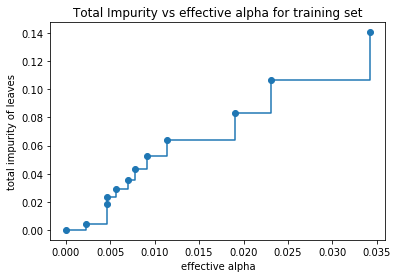

In [16]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Train the decision tree using the effective alphas.

In [17]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


Below, we see that as the effective alpha value increases, number of nodes and depth of tree decreases.

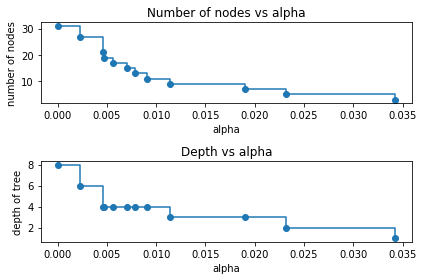

In [18]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

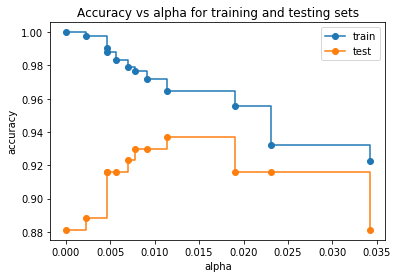

In [19]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

We see that the best value for ccp_alpha that maximizes the testing accuracy is approximately 0.015.

In [20]:
Tree = DecisionTreeClassifier(random_state = 0, criterion="entropy", ccp_alpha=0.015)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.015, criterion='entropy', random_state=0)

Using this best alpha value, I generated the Decision Tree.

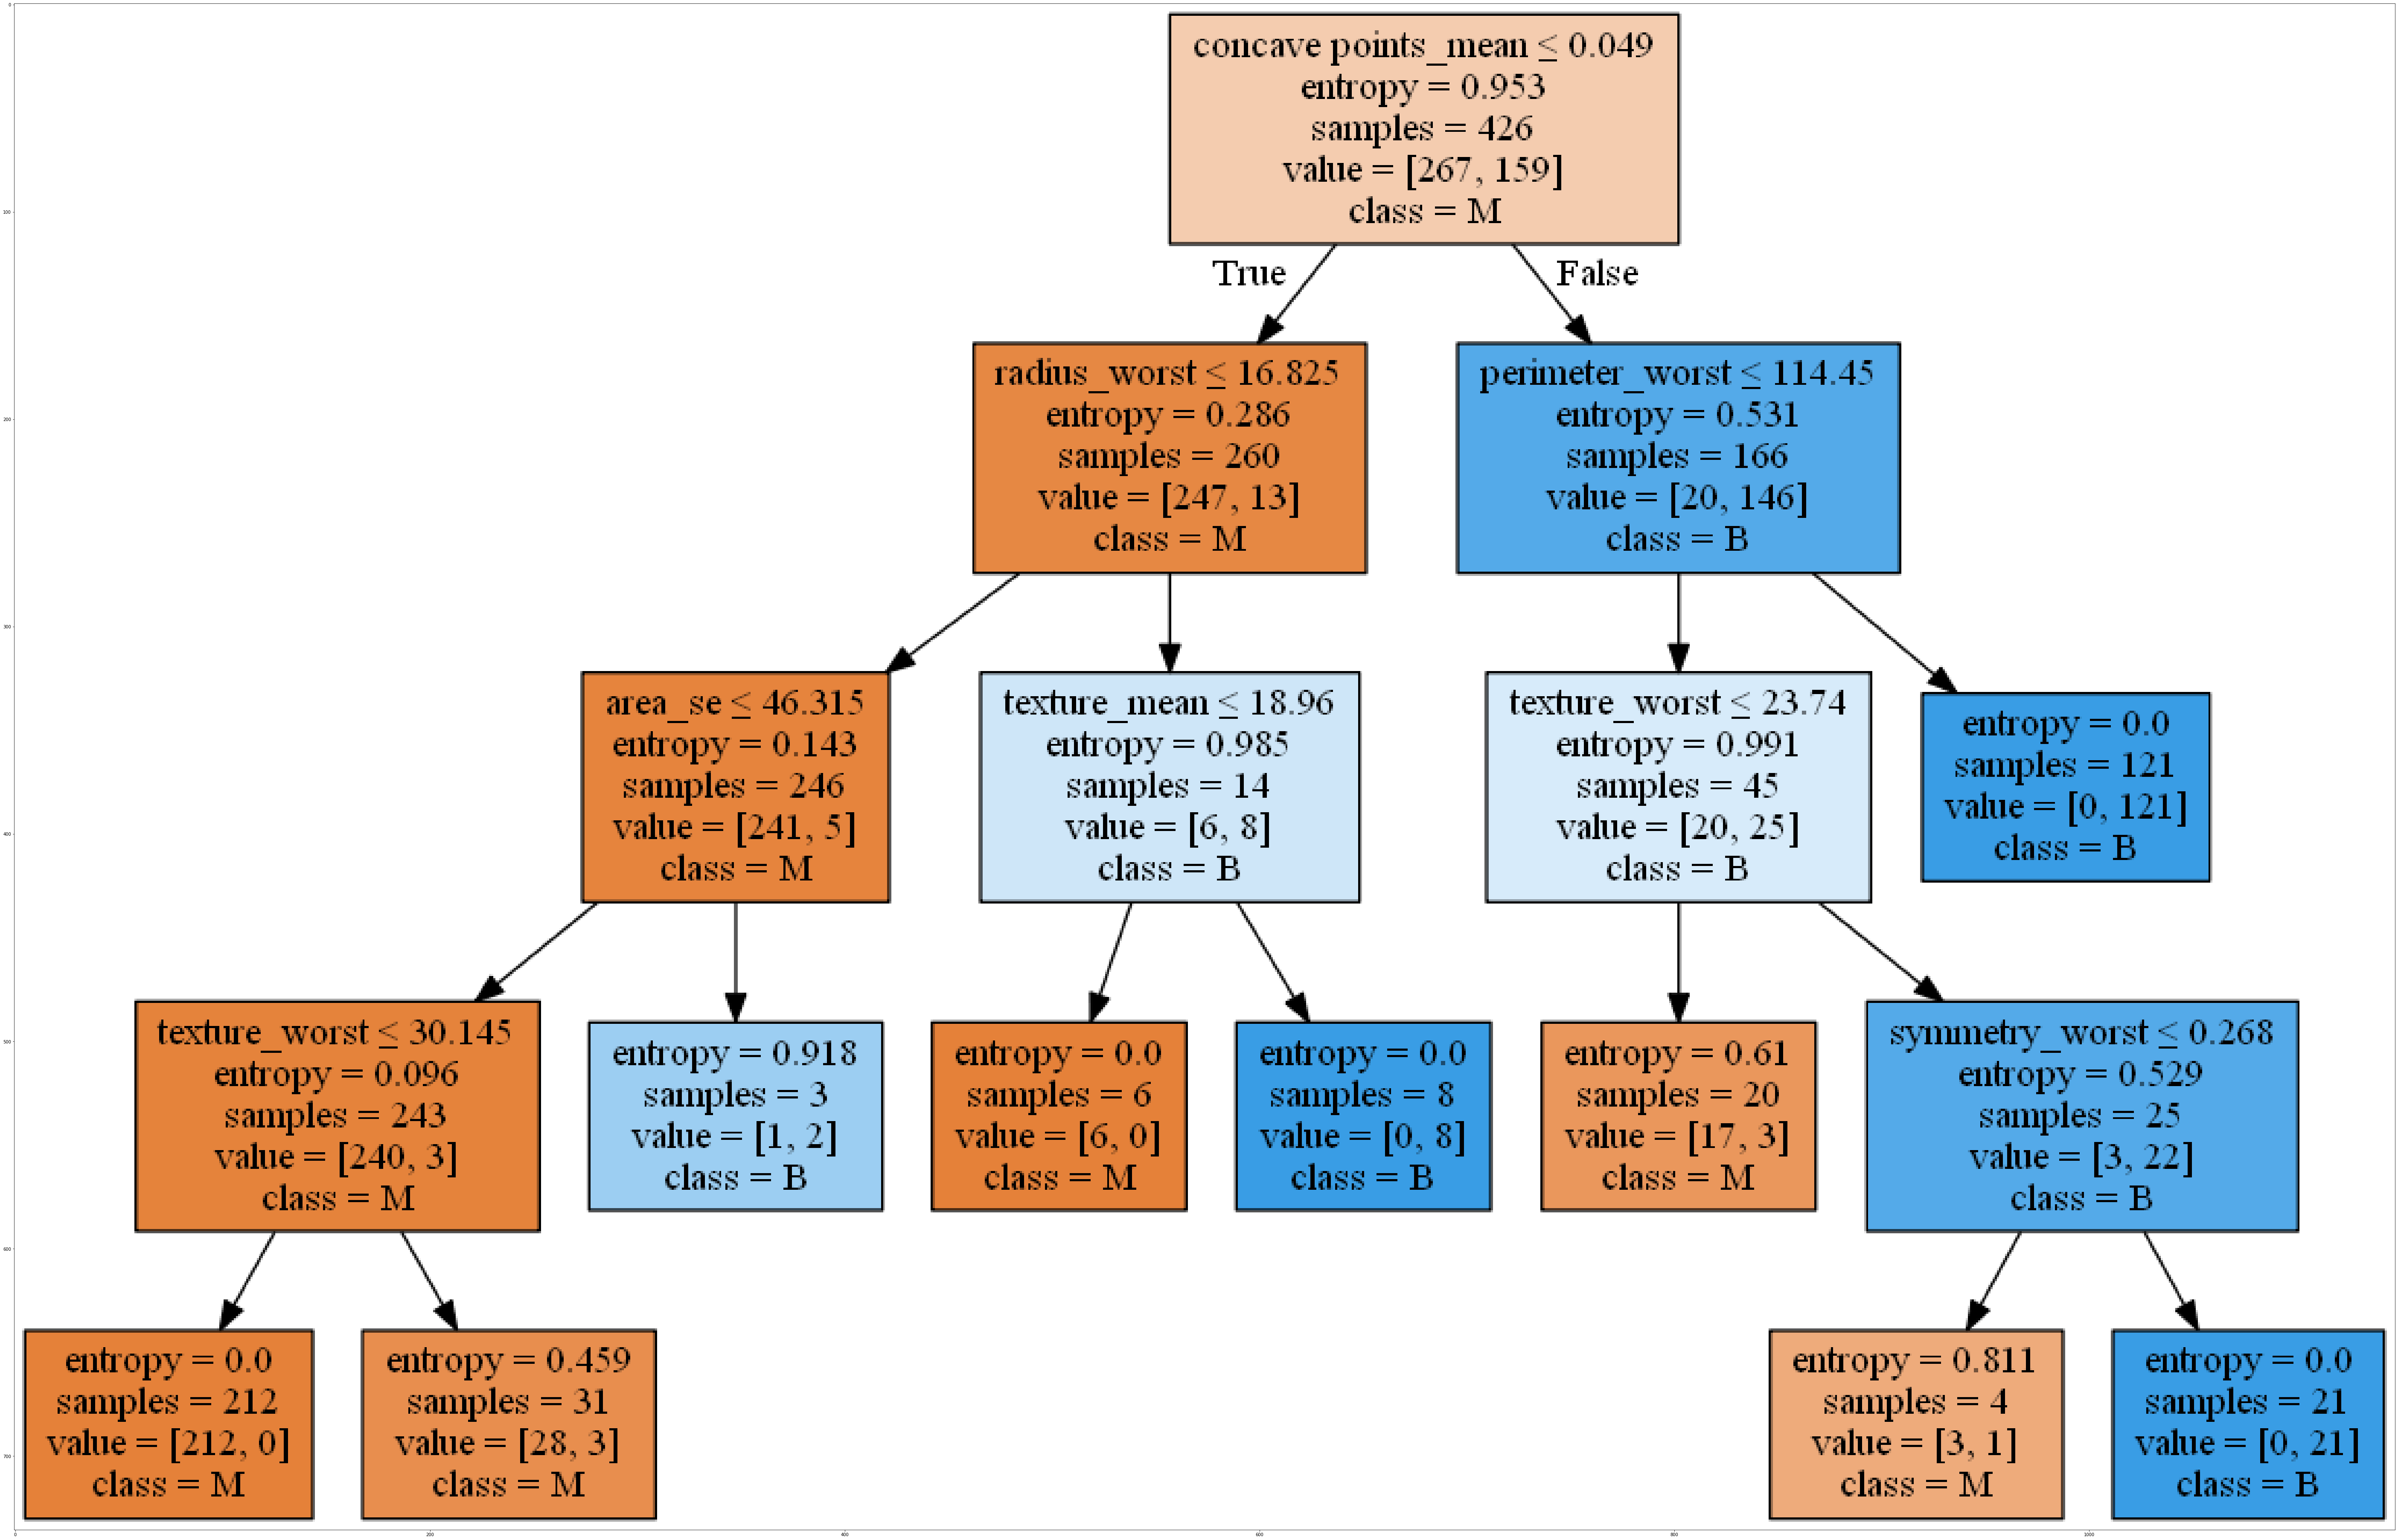

In [20]:
dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[2:]
targetNames = df['diagnosis'].unique().tolist()
out=tree.export_graphviz(Tree, feature_names=featureNames, out_file=dot_data, 
                         class_names=targetNames, filled=True,  
                         special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

As shown in the decision tree, the best predictors of diagnosis is the concave points_mean, radius_worst, perimeter_worst, area_se, texture_mean, texture_worst, and symmetry_worst. Therefore, we only keep these features. Number of features are reduced from 30 to 7.

In [117]:
df_X = df[['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_se', 'texture_mean', 'texture_worst', 'symmetry_worst']]

For the target variable 'diagnosis', convert the categorical variable (M and B) into binary variables (0 or 1) so that Malignant = 1 and Benign = 0.

In [118]:
dummy_variable = pd.get_dummies(df['diagnosis'])
df = pd.concat([df, dummy_variable], axis = 1)
df.drop('diagnosis', axis = 1, inplace = True)
df.drop('B', axis = 1, inplace = True)
df.rename(columns = {'M': 'diagnosis'}, inplace = True)

df_y = df['diagnosis']

Test the decision tree accuracy with these seven predictors.

In [23]:
# Train test split
X_train, X_test, y_train, y_test =train_test_split(df_X, df_y, test_size=0.25)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Build and train model with training data
DT = DecisionTreeClassifier(criterion="entropy", ccp_alpha = 0.015)
DT.fit(X_train,y_train)

# Evaluate model's predictions
print("Decision Tree Testing accuracy: ", DT.score(X_test, y_test))
print("Decision Tree Training accuracy: ", DT.score(X_train, y_train))
y_pred_DT = DT.predict(X_test)
print(metrics.classification_report(y_test, y_pred_DT))

# Cross-validation
scores = cross_val_score(DT, df_X, df_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
DT_CV = scores.mean()
print("Mean Cross-validation score:", DT_CV)

Train set: (426, 7) (426,)
Test set: (143, 7) (143,)
Decision Tree Testing accuracy:  0.9300699300699301
Decision Tree Training accuracy:  0.9812206572769953
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        94
           1       0.85      0.96      0.90        49

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.92       143
weighted avg       0.94      0.93      0.93       143

Cross-validation scores: [0.95614035 0.92105263 0.92982456 0.94736842 0.95575221]
Mean Cross-validation score: 0.9420276354603322


#### 2) Random Forest Classifier's Feature Importance property

From these seven predictor variables, I determined what is the most important feature by using Random Forest Classifier's feature_importances_, which returns the feature importance values, also known as Gini importance. The higher the value, the more important the feature.

Determine the best hyperparameters for Random Forest Classifier.

In [24]:
tr_labels = df_y
tr_features = df_X

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [25]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 7, 'n_estimators': 250}

0.917 (+/-0.046) for {'max_depth': 1, 'n_estimators': 5}
0.93 (+/-0.064) for {'max_depth': 1, 'n_estimators': 50}
0.93 (+/-0.064) for {'max_depth': 1, 'n_estimators': 250}
0.93 (+/-0.064) for {'max_depth': 1, 'n_estimators': 500}
0.956 (+/-0.047) for {'max_depth': 3, 'n_estimators': 5}
0.96 (+/-0.03) for {'max_depth': 3, 'n_estimators': 50}
0.958 (+/-0.041) for {'max_depth': 3, 'n_estimators': 250}
0.958 (+/-0.041) for {'max_depth': 3, 'n_estimators': 500}
0.954 (+/-0.048) for {'max_depth': 5, 'n_estimators': 5}
0.954 (+/-0.041) for {'max_depth': 5, 'n_estimators': 50}
0.961 (+/-0.014) for {'max_depth': 5, 'n_estimators': 250}
0.961 (+/-0.032) for {'max_depth': 5, 'n_estimators': 500}
0.949 (+/-0.034) for {'max_depth': 7, 'n_estimators': 5}
0.958 (+/-0.034) for {'max_depth': 7, 'n_estimators': 50}
0.963 (+/-0.028) for {'max_depth': 7, 'n_estimators': 250}
0.963 (+/-0.02) for {'max_depth': 7, 'n_estimators': 500}
0.951 (+/-0.018) for {

Train and fit the model using these best parameters.

In [26]:
RF = RandomForestClassifier(max_depth=7, n_estimators=250)
RF = RF.fit(X_train,y_train)

Best parameters had maximum depth of seven and number of estimators of 250. Following model training and fitting with these selected parameters, feature_importance_ property was used to calculate the Gini importance of each predictor variable.

In [27]:
feature_importance = pd.Series(RF.feature_importances_, index = df_X.columns).sort_values(ascending=False)
print(feature_importance)

concave points_mean    0.324796
perimeter_worst        0.233568
radius_worst           0.190753
area_se                0.108920
symmetry_worst         0.053020
texture_worst          0.050727
texture_mean           0.038217
dtype: float64


The most important feature (with the highest feature importance value) was concave points_mean, followed by perimeter_worst and radius_worst. This result confirmed our decision tree, which had concave points_mean as the root node and perimeter_worst and radius_worst as the top nodes. Therefore, the best predictors were the mean concave points, followed by worst perimeter, worst radius, standard error area, worst symmetry, worst texture, and mean texture.

Test the random forest accuracy with these best predictor variables.

In [28]:
# Train test split
X_train, X_test, y_train, y_test =train_test_split(df_X, df_y, test_size=0.25, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Build and train model with training data
RF = RandomForestClassifier(max_depth=7, n_estimators=250)
RF = RF.fit(X_train,y_train)

# Evaluate model's predictions
y_pred_RF = RF.predict(X_test)
print("Random Forest Testing accuracy: ", RF.score(X_test, y_test))
print("Random Forest Training accuracy: ", RF.score(X_train, y_train))
print("\n")
print(classification_report(y_test, y_pred_RF))

# Cross-validation
scores = cross_val_score(RF, df_X, df_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
RF_CV = scores.mean()
print("Mean Cross-validation score:", RF_CV)

Train set: (426, 7) (426,)
Test set: (143, 7) (143,)
Random Forest Testing accuracy:  0.972027972027972
Random Forest Training accuracy:  1.0


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        98
           1       1.00      0.91      0.95        45

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

Cross-validation scores: [0.95614035 0.94736842 0.97368421 0.95614035 0.96460177]
Mean Cross-validation score: 0.9595870206489675


### Question 2: How can we accurately predict cancer diagnosis?

From the seven best predictor variables we have selected, I would like to determine how to predict cancer diagnosis with the best accuracy. In order to achieve this task, I will build four different models (KNN, Gradient Boosting, XGBoost, and Logistic Regression), calculate their accuracy, and select the model with the best predictive accuracy.

#### 1) KNN Classifier

##### 1. Normalize data

In [23]:
X_prime = df_X.values
y = df_y.values
X = preprocessing.scale(X_prime)

##### 2. Train test split

In [24]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 7) (426,)
Test set: (143, 7) (143,)


##### 3. Hyperparameter tuning

Plot model accuracy for different number of Neighbours

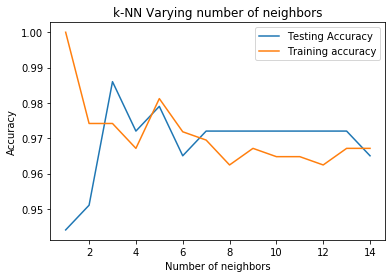

In [25]:
# 3. Calculate the best k value

# Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model 
    knn.fit(X_train, y_train) 
    #Compute accuracy on the training set 
    train_accuracy[i] = knn.score(X_train, y_train) 
    #Compute accuracy on the test set 
    test_accuracy[i] = knn.score(X_test, y_test) 

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [26]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.986013986013986 with k= 3


The best number of neighbours that maximizes the testing accuracy is when k = 3.

##### 4. Build and train model with training data

In [27]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##### 5. Evaluate the model's predictions

In [28]:
# Get training and testing accuracy and classification report.
y_pred_KNN = KNN.predict(X_test)
print("KNN Testing accuracy: ", KNN.score(X_test, y_test))
print("KNN Training accuracy: ", KNN.score(X_train, y_train))
print('\n')
print(metrics.classification_report(y_test, y_pred_KNN))
print('\n')

# 5-fold cross-validation
KNN = KNeighborsClassifier(n_neighbors = 3)
scores = cross_val_score(KNN, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
KNN_CV = scores.mean()
print("Mean Cross-validation score:", KNN_CV)

KNN Testing accuracy:  0.986013986013986
KNN Training accuracy:  0.9741784037558685


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        98
           1       1.00      0.96      0.98        45

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



Cross-validation scores: [0.97368421 0.93859649 0.97368421 0.97368421 0.98230088]
Mean Cross-validation score: 0.9683900015525542


The number of neighbours for kNN that maximized the testing accuracy was three, resulting in a testing accuracy of 0.986 and training accuracy of 0.974.
F1 scores for benign and malignant were 0.99 and 0.98 respectively, and overall accuracy was 0.99. Five-fold cross-validation score was 0.968.

##### 6. Create confusion matrix

Text(0.5, 1, 'KNN Confusion Matrix')

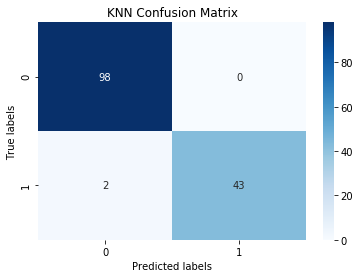

In [29]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
ax = plt.subplot()
sns.heatmap(cm_KNN, annot=True, ax = ax, fmt='g', cmap = 'Blues') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('KNN Confusion Matrix')

As shown in the confusion matrix, all 98 benign (label 0) samples have been correctly classified, however, from the 45 malignant (label 1) samples, two of them have been misclassified as benign.

#### 2) Gradient Boosting Classifier

##### 1. Hyperparameter tuning

In [30]:
# Calculate the best parameters
tr_labels = df_y
tr_features = df_X

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [37]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}

0.627 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.91 (+/-0.058) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.93 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.944 (+/-0.038) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.627 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.939 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.961 (+/-0.042) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.96 (+/-0.031) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.627 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.951 (+/-0.064) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.956 (+/-0.062) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.958 (+/-0.049) for {'learning_rat

Hyperparameter tuning using grid search (cv = 5) resulted in a learning rate of 0.01, maximum depth of three, and number of estimators of 250.

##### 2. Train test split

In [38]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 7) (426,)
Test set: (143, 7) (143,)


##### 3. Build and train model wtih training data

In [39]:
GB = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=3, n_estimators=250)
GB = GB.fit(X_train, y_train)

##### 4. Evaluate the model's predictions

In [40]:
# Get training and testing accuracy and classification report.
y_pred_GB = GB.predict(X_test)
print("GB Testing accuracy: ", GB.score(X_test, y_test))
print("GB Training accuracy: ", GB.score(X_train, y_train))
print("\n")
print(classification_report(y_test, y_pred_GB))

# Cross-validation
scores = cross_val_score(GB, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
GB_CV = scores.mean()
print("Mean Cross-validation score: ", GB_CV)

GB Testing accuracy:  0.9440559440559441
GB Training accuracy:  0.9929577464788732


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.93      0.89      0.91        45

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

Cross-validation scores: [0.96491228 0.92105263 0.97368421 0.98245614 0.96460177]
Mean Cross-validation score:  0.9613414066138798


F1 accuracy score was 0.94, and the testing and training accuracies were 0.944 and 0.993 respectively. Training accuracy being higher than the testing accuracy may signify overfitting. This issue will be discussed in the limitations. Cross-validation score was computed, which was 0.961.

##### 5. Create Confusion matrix

Text(0.5, 1, 'Gradient Boosting Confusion Matrix')

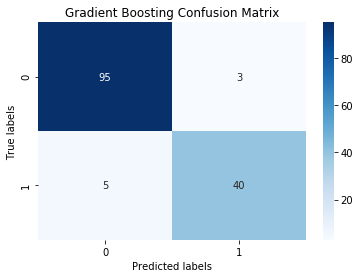

In [41]:
cm_GB = confusion_matrix(y_test, y_pred_GB)

ax = plt.subplot()
sns.heatmap(cm_GB,annot=True, ax = ax, fmt="g", cmap = 'Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Gradient Boosting Confusion Matrix')

Three of the benign samples have been misclassfied as malignant, while five of the malignant samples have been misclassified as benign.

#### 3) XGboost Classifier

In [42]:
import xgboost

##### 1. Hyperparameter tuning

In [43]:
params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [1, 3, 5, 7],
    "gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

In [44]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [45]:
classifier = xgboost.XGBClassifier()

In [46]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1,
                                  cv=5, verbose=3)

In [47]:
from datetime import datetime
start_time = timer(None) #timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) #timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



 Time taken: 0 hours 0 minutes and 26.03 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   25.9s finished


In [48]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

Hyperparameter tuning for XGBoost using randomized search (cv = 5) led to the best parameters are shown above.

##### 2. Train test split

In [49]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 7) (426,)
Test set: (143, 7) (143,)


##### 3. Build and train model wtih training data

In [50]:
XGB = xgboost.XGBClassifier(min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.4)
XGB = XGB.fit(X_train, y_train)

##### 4. Evaluate the model's predictions

In [51]:
# Get training and testing accuracy and classification report
y_pred_XGB = XGB.predict(X_test)
print("XGB Testing accuracy: ", XGB.score(X_test, y_test))
print("XGB Training accuracy: ", XGB.score(X_train, y_train))
print("\n")
print(classification_report(y_test, y_pred_XGB))

#Cross-validation
scores = cross_val_score(XGB, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
XGB_CV = scores.mean()
print("Mean Cross-validation score: ", XGB_CV)

XGB Testing accuracy:  0.958041958041958
XGB Training accuracy:  0.9835680751173709


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        98
           1       0.95      0.91      0.93        45

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

Cross-validation scores: [0.93859649 0.94736842 0.98245614 0.96491228 0.96460177]
Mean Cross-validation score:  0.9595870206489675


Testing and training accuracy were 0.958 and 0.983 respectively, f1-score was 0.96, and cross-validation score was 0.96.

##### 5. Create confusion matrix

Text(0.5, 1, 'XGBoost Confusion Matrix')

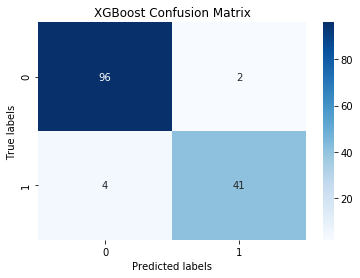

In [52]:
# Confusion matrix
cm_XGB = confusion_matrix(y_test, y_pred_XGB)

ax = plt.subplot()
sns.heatmap(cm_XGB,annot=True, ax = ax, fmt="g", cmap = 'Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('XGBoost Confusion Matrix')

From the 98 benign patients, two have been incorrectly classified as malignant while four of the malignant patients have been misclassified as benign.

#### 4) Logistic Regression Classifier

##### 1. Check for feature dependencies

For logistic regression, a heatmap was displayed to check for feature dependencies because highly correlated features are not effective and reliable for the model. As displayed, feature dependencies were evident (correlation value higher than 0.5). Concave points_mean, radius_worst, perimeter_worst, and area_se were highly correlated with each other, while texture_mean was highly correlated with texture_worst. For that reason, one of these features was dropped.

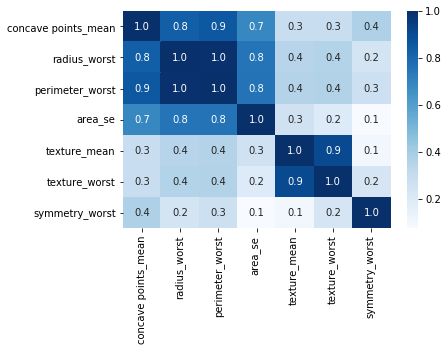

In [31]:
f, ax = plt.subplots()
sns.heatmap(df_X.corr(), annot=True, fmt='.1f', ax=ax, cmap="Blues")

A function was created that removed a correlation threshold value higher than 0.5. Running this function reduced the number of variables from seven to three, resulting in all correlation values below the threshold. The remaining features were concave points_mean, texture_mean, and symmetry_worst.

In [32]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [33]:
correlation(df_X, 0.5)

     concave points_mean  texture_mean  symmetry_worst
0                0.14710         10.38          0.4601
1                0.07017         17.77          0.2750
2                0.12790         21.25          0.3613
3                0.10520         20.38          0.6638
4                0.10430         14.34          0.2364
..                   ...           ...             ...
564              0.13890         22.39          0.2060
565              0.09791         28.25          0.2572
566              0.05302         28.08          0.2218
567              0.15200         29.33          0.4087
568              0.00000         24.54          0.2871

[569 rows x 3 columns]


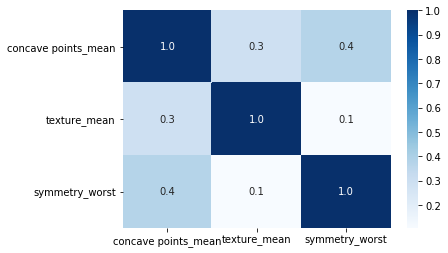

In [34]:
sns.heatmap(df_X.corr(), annot=True, fmt='.1f', cmap="Blues")

Number of variables are reduced from seven to three. Now the correlation values are relatively low, implying that these three features are independent of each other.

##### 2. Train Test Split

In [35]:
X = df_X
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 3) (426,)
Test set: (143, 3) (143,)


##### 3. Hyperparameter tuning

In [36]:
logModel = LogisticRegression()

In [37]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

In [38]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

In [39]:
best_clf = clf.fit(X,y)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 2884 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 4796 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6596 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 7993 out of 8000 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:  2.5min finished


In [41]:
best_clf.best_estimator_

LogisticRegression(C=545.5594781168514)

Hyperparameter tuning using grid search method (cv = 5) gave the best parameter shown above.

##### 4. Build and train model using training data

In [42]:
LR = LogisticRegression(C=545.5594781168514)
LR.fit(X_train, y_train)

LogisticRegression(C=545.5594781168514)

##### 5. Evaluate model's predictions

In [43]:
# Get training and testing accuracy and classification report.
print("LR Testing accuracy: ", LR.score(X_test, y_test))
print("LR Training accuracy: ", LR.score(X_train, y_train))
print("\n")
y_pred_LR = LR.predict(X_test)
print(classification_report(y_test, y_pred_LR))

# Cross-validation
scores = cross_val_score(LR, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
LR_CV = scores.mean()
print("Mean Cross-validation score: ", LR_CV)

LR Testing accuracy:  0.9440559440559441
LR Training accuracy:  0.9413145539906104


              precision    recall  f1-score   support

           0       0.93      0.99      0.96        98
           1       0.97      0.84      0.90        45

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.95      0.94      0.94       143

Cross-validation scores: [0.92105263 0.92982456 0.94736842 0.93859649 0.9380531 ]
Mean Cross-validation score:  0.934979040521658


Evaluating the model’s predictions, the logistic regression’s testing and training accuracies were 0.944 and 0.941 respectively, f1-score was 0.94, and cross-validation score was 0.935.

##### 6. Create Confusion matrix

Text(0.5, 1, 'Logistic Regression Confusion Matrix')

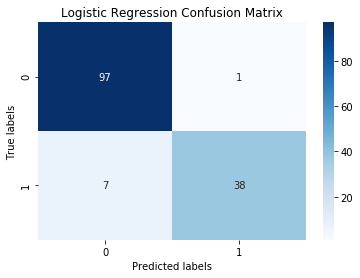

In [44]:
cm_LR = confusion_matrix(y_test, y_pred_LR)

ax = plt.subplot()
sns.heatmap(cm_LR, annot=True, ax = ax, fmt='g', cmap = 'Blues') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix')

Two benign patients have been incorrecly classified as malignant and six malignant patients have been incorrectly classified as benign.

#### 5) Show table comparing accuracy of the five models

A summary table below depicts cross-validation, accuracy, recall, precision, and F1-scores for all four models. This table indicates that our prediction with KNN had the best predictive accuracy. Therefore, we chose KNN to predict diagnosis.

In [66]:
# KNN
accuracy_KNN, recall_KNN, precision_KNN, f1_KNN = accuracy_score(y_test, y_pred_KNN), recall_score(y_test, y_pred_KNN), precision_score(y_test, y_pred_KNN), f1_score(y_test, y_pred_KNN)
# GB
accuracy_GB, recall_GB, precision_GB, f1_GB = accuracy_score(y_test, y_pred_GB), recall_score(y_test, y_pred_GB), precision_score(y_test, y_pred_GB), f1_score(y_test, y_pred_GB)
# XGBoost
accuracy_XGB, recall_XGB, precision_XGB, f1_XGB = accuracy_score(y_test, y_pred_XGB), recall_score(y_test, y_pred_XGB), precision_score(y_test, y_pred_XGB), f1_score(y_test, y_pred_XGB)
# LR
accuracy_LR, recall_LR, precision_LR, f1_LR = accuracy_score(y_test, y_pred_LR), recall_score(y_test, y_pred_LR), precision_score(y_test, y_pred_LR), f1_score(y_test, y_pred_LR)

In [85]:
accuracy_table = pd.DataFrame(index = ['KNN', 'Gradient Boosting', 'XGBoost', 'Logistic Regression'])
accuracy_table['Cross-validation'] = [KNN_CV, GB_CV, XGB_CV, LR_CV]
accuracy_table['Accuracy'] = [accuracy_KNN, accuracy_GB, accuracy_XGB, accuracy_LR]
accuracy_table['Recall'] = [recall_KNN, recall_GB, recall_XGB, recall_LR]
accuracy_table['Precision'] = [precision_KNN, precision_GB, precision_XGB, precision_LR]
accuracy_table['F1-score'] = [f1_KNN, f1_GB, f1_XGB, f1_LR]
accuracy_table.sort_values(by='Cross-validation', ascending=False)

,Cross-validation,Accuracy,Recall,Precision,F1-score
KNN,0.968390,0.986014,0.955556,1.000000,0.977273
Gradient Boosting,0.961341,0.944056,0.888889,0.930233,0.909091
XGBoost,0.959587,0.958042,0.911111,0.953488,0.931818
Logistic Regression,0.933225,0.944056,0.866667,0.951220,0.906977


As an extra for our analysis, Pycaret package was run to examine whether it confirmed our result. Pycaret determines the best model based on comparison between the accuracy of 15 different models. The table below displays the accuracy of the 15 different models.

In [68]:
from pycaret.classification import *

In [69]:
setup

<function pycaret.classification.setup(data, target, train_size=0.7, sampling=True, sample_estimator=None, categorical_features=None, categorical_imputation='constant', ordinal_features=None, high_cardinality_features=None, high_cardinality_method='frequency', numeric_features=None, numeric_imputation='mean', date_features=None, ignore_features=None, normalize=False, normalize_method='zscore', transformation=False, transformation_method='yeo-johnson', handle_unknown_categorical=True, unknown_categorical_method='least_frequent', pca=False, pca_method='linear', pca_components=None, ignore_low_variance=False, combine_rare_levels=False, rare_level_threshold=0.1, bin_numeric_features=None, remove_outliers=False, outliers_threshold=0.05, remove_multicollinearity=False, multicollinearity_threshold=0.9, remove_perfect_collinearity=False, create_clusters=False, cluster_iter=20, polynomial_features=False, polynomial_degree=2, trigonometry_features=False, polynomial_threshold=0.1, group_features=

In [70]:
df = pd.read_csv("datasets_180_408_data.csv")
df.drop(['Unnamed: 32'], axis = 1, inplace = True)
df = df[['diagnosis', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_se',
       'texture_mean', 'texture_worst', 'symmetry_worst']]

exp = setup(df, target = 'diagnosis', normalize=True, feature_selection=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,7641
1,Target Type,Binary
2,Label Encoded,"B: 0, M: 1"
3,Original Data,"(569, 8)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [71]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.9700,0.9917,0.9400,0.9812,0.9577,0.9346,0.9378,0.0134
1,K Neighbors Classifier,0.9624,0.9804,0.9062,0.9929,0.9459,0.9175,0.9213,0.0065
2,Extra Trees Classifier,0.9599,0.9914,0.9267,0.9666,0.9437,0.9128,0.9159,0.2059
3,CatBoost Classifier,0.9599,0.9888,0.9400,0.9538,0.9449,0.9135,0.9157,3.4275
4,Ridge Classifier,0.9549,0.0000,0.8790,1.0000,0.9338,0.9001,0.9062,0.0082
5,SVM - Linear Kernel,0.9548,0.0000,0.9462,0.9382,0.9387,0.9031,0.9072,0.0060
6,Light Gradient Boosting Machine,0.9524,0.9871,0.9333,0.9408,0.9347,0.8974,0.9000,0.0653
7,Extreme Gradient Boosting,0.9523,0.9836,0.9262,0.9462,0.9341,0.8968,0.8992,0.0449
8,Linear Discriminant Analysis,0.9499,0.9875,0.8724,0.9929,0.9271,0.8894,0.8952,0.0063
9,Naive Bayes,0.9447,0.9930,0.8919,0.9599,0.9222,0.8795,0.8835,0.0049


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7641, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Contrary to our result, Logistic regression had the best accuracy as indicated in the table. However, according to our result, logistic regression had the lowest accuracy with score of 0.93, while KNN classifier had the best accuracy with score of 0.97.

#### 6. Make predictions with kNN

As aforementioned, kNN was selected for predicting cancer diagnosis. Table below shows the predicted and actual labels of the first ten patients, where 0 is benign and 1 is malignant.

In [75]:
# Load dataset again, remove column with missing values, and convert diagnosis variable into dummy variable.
df = pd.read_csv("datasets_180_408_data.csv")
df.drop(['Unnamed: 32'], axis = 1, inplace = True)
dummy_variable = pd.get_dummies(df['diagnosis'])
df = pd.concat([df, dummy_variable], axis = 1)
df.drop('diagnosis', axis = 1, inplace = True)
df.drop('B', axis = 1, inplace = True)
df.rename(columns = {'M': 'diagnosis'}, inplace = True)

# Select only the seven predictor variables and id.
X = df[['id', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_se', 'texture_mean', 
           'texture_worst', 'symmetry_worst']]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

Save the ID column, and drop the ID column in train and test datasets

In [76]:
train_id = X_train['id']
test_id = X_test['id']
X_train = X_train.iloc[:,1:]
X_test = X_test.iloc[:,1:]

In [77]:
result_KNN = pd.DataFrame()
result_KNN['id'] = test_id
result_KNN['Predicted'] = y_pred_KNN
result_KNN['Actual'] = y_test
test_correct = np.array(result_KNN['Predicted']) == np.array(result_KNN['Actual'])
result_KNN['Correct'] = test_correct
result_KNN.head(10) # Show first ten samples

,id,Predicted,Actual,Correct
350,899187,0,0,True
259,88725602,1,1,True
115,864685,0,0,True
60,858970,0,0,True
275,8911164,0,0,True
53,857392,1,1,True
221,8812818,0,0,True
284,8912284,0,0,True
146,869691,1,1,True
480,912193,0,0,True


Table displayed below indicates the number of incorrectly diagnosed patients. There were two patients (patient 91594602 and 855167) who were misclassified as benign when they were in fact, malignant. This outcome was further reinforced by the confusion matrix as shown earlier in our kNN analysis, that describes the performance of the kNN classification model. All 98 benign patients have been correctly predicted, whereas from the 45 malignant patients, two of them have been erroneously classified as benign.

In [79]:
incorrect_diagnosis = list(result_KNN['Correct']).count(False)
print("Number of incorrectly diagnosed patients: ", incorrect_diagnosis)

index = result_KNN.index[result_KNN['Correct'] == False].tolist()
result_KNN.loc[index,]

Number of incorrectly diagnosed patients:  2


,id,Predicted,Actual,Correct
514,91594602,0,1,False
40,855167,0,1,False


### Visualize in 3D graph

Finally, to visualize the graph in three-dimensional space, top three features with the highest importance were selected, which were:
* mean concave points
* worst radius
* worst perimeter

In [80]:
from mpl_toolkits.mplot3d import Axes3D

In [81]:
df_top3 = df[['id', 'diagnosis', 'concave points_mean', 'radius_worst', 'perimeter_worst']]

In [82]:
M_index = df_top3.index[df_top3['diagnosis'] == 1]
df_M = df_top3.loc[M_index,]

In [83]:
B_index = df_top3.index[df['diagnosis'] == 0]
df_B = df_top3.loc[B_index,]

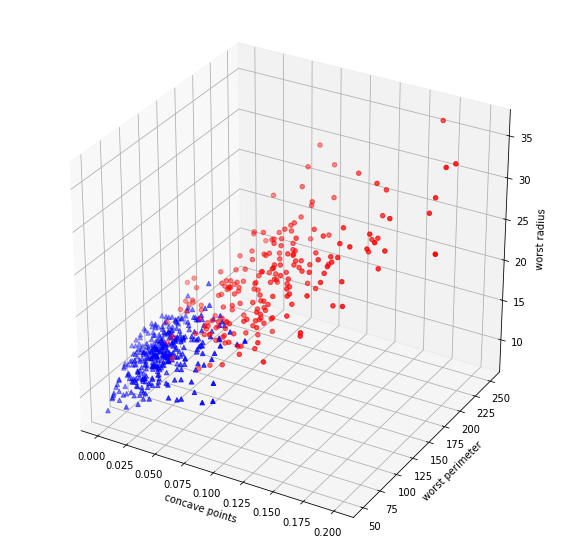

In [84]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

Xm = df_M['concave points_mean'].values
Ym = df_M['perimeter_worst'].values
Zm = df_M['radius_worst'].values

Xb = df_B['concave points_mean'].values
Yb = df_B['perimeter_worst'].values
Zb = df_B['radius_worst'].values

ax.scatter(Xm, Ym, Zm, c='r', marker='o')
ax.scatter(Xb, Yb, Zb, c='b', marker='^')

ax.set_xlabel('concave points')
ax.set_ylabel('worst perimeter')
ax.set_zlabel('worst radius')

plt.show()

This graph illustrates a clear distinction between the two classes, Malignant and Benign. The Malignant group represented in red generally had higher values compared to the Benign group represented in blue.

## 7. Discussion

Contrary to our assumption, logistic regression had the lowest score, while kNN classifier had the best performance. The explanation for logistic regression’s low performance may be due to the reduction in the number of features to three to avoid feature dependencies. When we ran the model without taking multicollinearity into account, the accuracy score for logistic regression was comparatively higher. Some researchers that have used logistic regression with the same datasets reached accuracy as high as 0.98, however, they did not take into consideration feature dependencies in the dataset, which insinuated that the model was less reliable and potentially numerically unstable. The rationale for kNN’s high performance may be due to feature selection in combination with kNN that resulted in improvement of its predictive accuracy. Furthermore, all numeric features, no missing values and minimal noisy data, may have also contributed to kNN’s high performance.
<br>
<br>
n terms of limitations, there were several that were noted. One important limitation to accentuate was the occurrence of overfitting, particularly in the gradient boosting and XGboost models. Overfitting was the result of our high training accuracy, as the model was excessively trained to the data, capturing noise, and making the model less generalized. This overfitting may have been due to extreme outliers present in the data. Because it was anticipated that removal of outliers would reduce overfitting, we ran all models with the removed outliers. Nevertheless, this modification reduced the sample size from 569 to 277 and more overlap between the malignant and benign classes were evident. This significant reduction in sample size and more overlap between the two classes resulted in lower performance, and hence, we decided to keep the outliers in our analysis. Moreover, we have also tried increasing the size of training dataset to reduce overfitting, however, increaseing the training set did not have any effect, therefore, we decided to keep the size as default 75%.

## 8. References

Government of Canada (2019). Breast cancer. Retrieved from https://www.canada.ca/en/public-health/services/chronic-diseases/cancer/breast-cancer.html

Mazzanti, C., Zeiger, A. M., Costourous, N., …Libutti, S. K. (2004). Using Gene Expression Profiling to Differentiate Benign versus Malignant Thyroid Tumors. Cancer Research, 64(8), 2898-2903.

Scikit-learn (2020). Post pruning decision trees with cost complexity pruning. Retrieved from https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

Stone, M. (1974). Cross-validatory choice and assessment of statistical predictions. Journal of the Royal Statistical Society, 36(2), 111-147.

Street W. N., Wolberg W. H., & Mangasarian, O. L. (1993). Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, 1905, 861-870.

UCI Machine Learning Repository (1995). Breast Cancer Wisconsin (Diagnostic) Data Set. Archive.Ics.Uci.Edu, 2020, Retrieved from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).

Wolberg W. H., Street W. N., Heisey, D., & Mangasarian, O. L. (1994). Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters, 77, 163-171.

Wolberg W. H., Street W. N., Heisey, D., & Mangasarian, O. L. (1995). Image analysis and machine learning applied to breast cancer diagnosis and prognosis. Analytical and Quantitative Cytology and Histology, 17(2), 77-87.

Wolberg W. H., Street W. N., Heisey, D., & Mangasarian, O. L. (1995). Computerized breast cancer diagnosis and prognosis from fine needle aspirates.  Archives of Surgery, 130(5), 511-516.

Wolberg W. H., Street W. N., Heisey, D., & Mangasarian, O. L. (1995). Computer-derived nuclear features distinguish malignant from benign breast cytology. Human Pathology, 26(7), 792-796.


Wolberg W. H., Street W. N., Heisey, D., & Mangasarian, O. L. (1995). Breast Cancer Diagnosis and Prognosis via Linear Programming. Operations Research, 43(4), 570–577. 

World Health Organization (2020). Breast cancer. Retrieved from https://www.who.int/cancer/prevention/diagnosis-screening/breast-cancer/en/